In [1]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [2]:
import pandas as pd
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
data['PRICE'] = boston_dataset.target

<dl>
    <dd><strong>Modified model:</strong></dd>
    <dd>
        <ul>
        <li>Transformed using log prices</li>
        <li>Simplified by dropping two features</li>
        </ul>
    </dd>
</dl>    

In [3]:
import numpy as np
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

In [5]:
import statsmodels.api as sm
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

C:\Users\Lee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Residuals (method 1):

In [6]:
results.resid

50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64

### Residuals (method 2):

In [7]:
residuals = y_train - results.fittedvalues

In [8]:
type(residuals)

pandas.core.series.Series

In [9]:
residuals.describe()

count    4.040000e+02
mean    -3.053663e-15
std      1.841779e-01
min     -7.330963e-01
25%     -9.881733e-02
50%     -1.499545e-02
75%      9.870289e-02
max      7.907087e-01
dtype: float64

In [10]:
residuals

50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64

### Graph of Actual vs. Predicted House Prices:

In [11]:
corr = round(y_train.corr(results.fittedvalues), 2)

In [12]:
corr

0.89

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

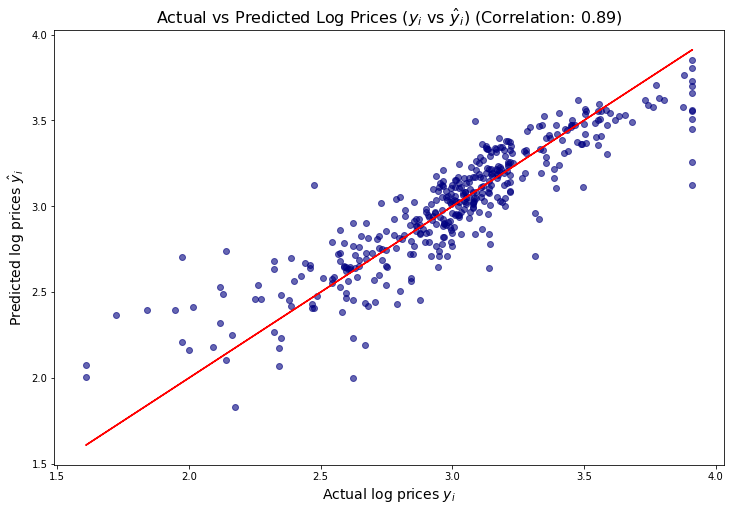

In [48]:
plt.figure(figsize=[12, 8]) # width, height

plt.title(f'Actual vs Predicted Log Prices ($y _i$ vs $\hat y_i$) (Correlation: {corr})', fontsize=16)
plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y_i$', fontsize=14)

plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color='red')
plt.show()

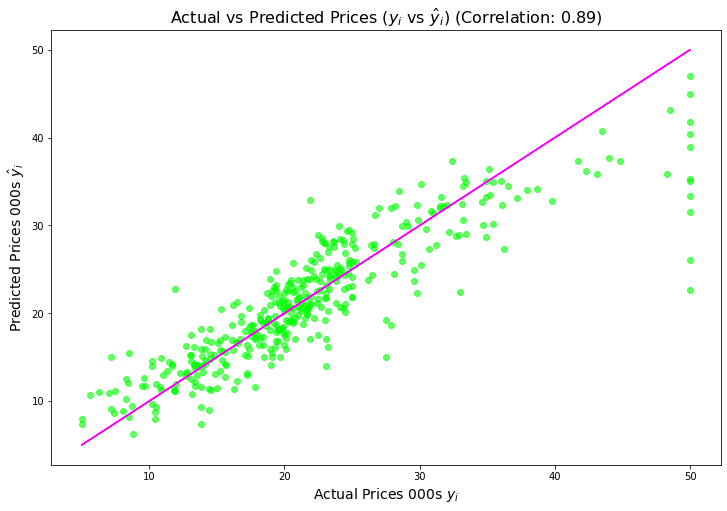

In [49]:
plt.figure(figsize=[12, 8]) # width, height

plt.title(f'Actual vs Predicted Prices ($y _i$ vs $\hat y_i$) (Correlation: {corr})', fontsize=16)
plt.xlabel('Actual Prices 000s $y _i$', fontsize=14)
plt.ylabel('Predicted Prices 000s $\hat y_i$', fontsize=14)

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='lime', alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train, color='magenta')
plt.show()